Мы спарсили объявления с сайта auto.ru с помощью скрипта.

В каталоге train лежит много csv файлов, и теперь нужно с ними поработать.

* Объединим их в один датасет
* Удалим дубликаты
* Приведем собранные данные в тот же формат, что и в тестовом наборе

In [5]:
import os
import pandas as pd

In [6]:
TRAIN_FOLDER_PATH = "train_folder"

In [7]:
df_train = []
for file_name in os.listdir(TRAIN_FOLDER_PATH):
    #print(pd.read_csv(os.path.join(TRAIN_FOLDER_PATH,file_name)).shape)
    df_train.append(pd.read_csv(os.path.join(TRAIN_FOLDER_PATH,file_name)))
df = pd.concat(df_train)

In [8]:
df.shape

(175716, 34)

In [9]:
#df.info()
df.color

0       040001
1       200204
2       97948F
3       040001
4       040001
         ...  
1845    4A2197
1846    007F00
1847    97948F
1848    200204
1849    FAFBFB
Name: color, Length: 175716, dtype: object

In [10]:
df.isna().sum()

bodyType                     0
brand                        0
car_url                      0
color                        0
complectation_dict           0
description               1546
engineDisplacement           0
enginePower                  0
location                     0
equipment_dict               0
fuelType                     0
image                        0
mileage                      0
modelDate                    0
model_info                   0
model_name                   0
name                         0
numberOfDoors                0
parsing_unixtime             0
priceCurrency                0
productionDate               0
sell_id                      0
super_gen                    0
vehicleConfiguration         0
vehicleTransmission          0
vendor                       0
Владельцы                38841
Владение                149547
ПТС                        424
Привод                       0
Руль                         0
Состояние                    0
Таможня 

## Обрабатываем набор

In [11]:
def make_raw_train_data_like_test(df):
    """
    Функция преобразует спарсенные данные так, чтобы они были в таком же формате
    как и данные в тестовом наборе из соревнования kaggle
    """
    df.bodyType = df.bodyType.str.lower()\
                    .str.replace(' gran turismo','')\
                    .str.replace(' gran coupe','')\
                    .str.replace(' compact','')\
                    .str.replace(' roadster','')\
                    .str.replace(' single cab','')\
                    .str.replace(' lucida','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' regius','')\
                    .str.replace(' double cab','')\
                    .str.replace(' gran tourer','')\
                    .str.replace(' lwb','')\
                    .str.replace(' xl','')\
                    .str.replace(' sportback','')\
                    .str.replace(' type-s','')\
                    .str.replace(' us market','')\
                    .str.replace(' scout','')\
                    .str.replace(' emina','')\
                    .str.replace(' l2','')\
                    .str.replace(' crewmax','')\
                    .str.replace(' extralong','')\
                    .str.replace(' swb','')\
                    .str.replace(' pullman','')\
                    .str.replace(' extra','')\
                    .str.replace(' phv','')\
                    .str.replace(' l3','')\
                    .str.replace(' all-terrain','')\
                    .str.replace(' del sol','')\
                    .str.replace(' life maxi','')\
                    .str.replace(' 76','')\
                    .str.replace(' spada','')\
                    .str.replace(' lucida','')\
                    .str.replace(' gita','')\
                    .str.replace(' alltrack','')\
                    .str.replace(' blit','')\
                    .str.replace(' kasten','')\
                    .str.replace(' allspace','')\
                    .str.replace(' arctic trucks','')\
                    .str.replace(' 78','')\
                    .str.replace(' noah','')\
                    .str.replace(' l1','')\
                    .str.replace(' japan market','')\
                    .str.replace(' fielder','')\
                    .str.replace(' ardeo','')\
                    .str.replace(' 79','')\
                    .str.replace(' runx','')\
                    .str.replace(' gracia','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' single cab','')\
                    .str.replace(' cross','')\
                    .str.replace(' gracia','')\
                    .str.replace(' liftback','')\
                    .str.replace(' xc','')\
                    .str.replace(' latio','')\
                    .str.replace(' spike','')\
                    .str.replace(' bed','')\
                    .str.replace(' 4x4','')\
                    .str.replace(' 120','')\
                    .str.replace(' regius','')\
                    .str.replace(' california','')\
                    .str.replace(' life','')\
                    .str.replace(' maxi','')\
                    .str.replace(' axio','')\
                    .str.replace(' gt','')\
                    .str.replace(' t150','')\
                    .str.replace(' spaceback','')\
                    .str.replace(' regular cab','')\
                    .str.replace(' cargo','')\
                    .str.replace(' long','')\
                    .str.replace(' l','')\
                    
    colors = {
    '040001':'чёрный',
    '0000CC':'синий',
    'FAFBFB':'белый',
    '97948F':'серый',
    'CACECB':'серый',
    '200204':'чёрный',
    'EE1D19':'красный',
    'FFC0CB':'розовый',
    'C49648':'золотистый',
    '22A0F8':'голубой',
    'FF8649':'оранжевый',
    '007F00':'зелёный',
    'DEA522':'золотистый',
    '660099':'фиолетовый',
    '4A2197':'фиолетовый',
    'FFD600':'жёлтый'
    }
    df.color = df.color.map(colors)
    
    fuelTypes = {
    'DIESEL':'дизель',
    'GASOLINE':'бензин',
    'LPG':'газ',
    'HYBRID':'гибрид',
    'ELECTRO':'электро',
    }
    df.fuelType = df.fuelType.map(fuelTypes)
    
    df.modelDate = df.modelDate.astype(float)
    
    df.numberOfDoors = df.numberOfDoors.astype(float)
    
    df.loc[df.brand=='Mercedes-Benz','brand'] = 'MERCEDES'
    df.brand = df.brand.str.upper()
    
    transmissionTypes = {
    'AUTOMATIC':'автоматическая',
    'MECHANICAL':'механическая',
    'ROBOT':'роботизированная',
    'VARIATOR':'вариатор'
    }
    df.vehicleTransmission = df.vehicleTransmission.map(transmissionTypes)
    
    pTypes = {
    'ALL_WHEEL_DRIVE':'полный',
    'REAR_DRIVE':'задний',
    'FORWARD_CONTROL':'передний',
    }
    df['Привод'] = df['Привод'].map(pTypes)
    
    pTypes = {
    'LEFT':'Левый',
    'RIGHT':'Правый',
    }
    df['Руль'] = df['Руль'].map(pTypes)
    
    pTypes = {
    True:'Не требует ремонта',
    }
    df['Состояние'] = df['Состояние'].map(pTypes)
    
    pTypes = {
    1:'1\xa0владелец',
    2:'2\xa0владельца',
    3:'3 или более',
    }
    df['Владельцы'] = df['Владельцы'].map(pTypes)
    
    pTypes = {
    'ORIGINAL':'Оригинал',
    'DUPLICATE':'Дубликат'
    }
    df['ПТС'] = df['ПТС'].map(pTypes)
    
    pTypes = {
    True:'Растаможен',
    }
    df['Таможня'] = df['Таможня'].map(pTypes)
    
    df.model_name = df.model_name.str.upper()

In [12]:
make_raw_train_data_like_test(df)

## Удалим дублирующиеся значения

In [13]:
df.drop_duplicates(['car_url'], inplace=True)
df.reset_index(inplace=True)

In [14]:
df.shape

(37079, 35)

После удаления дублей осталось всего 34340 записей, что чуть меньше тестового набора. Пока поработаем с этимми данными, а затем уже спарсим больше.

## Проанализируем колонки

### bodyType

In [18]:
print(df.bodyType.unique())
print(df.bodyType.nunique())

['седан' 'внедорожник 5 дв.' 'универсал 5 дв.' 'минивэн' 'купе-хардтоп'
 'хэтчбек 5 дв.' 'лифтбек' 'купе' 'фургон' 'компактвэн'
 'пикап двойная кабина' 'пикап одинарная кабина' 'хэтчбек 3 дв.'
 'внедорожник 3 дв.' 'кабриолет' 'микровэн' 'универсал 3 дв.' 'родстер'
 'седан-хардтоп' 'минивэн caravan elgrand' 'седан 2 дв.'
 'внедорожник открытый' 'универсал 3 дв.1' 'пикап полуторная кабина'
 'седан-хардтоп ceres' 'универсал 5 дв. qualis' 'лимузин']
27


### brand

In [16]:
df.brand.value_counts()

MERCEDES      4136
VOLKSWAGEN    3847
SKODA         3786
MITSUBISHI    3775
BMW           3771
NISSAN        3749
TOYOTA        3696
AUDI          3696
VOLVO         2221
HONDA         1688
LEXUS         1685
INFINITI      1029
Name: brand, dtype: int64

### color

In [20]:
df.color.value_counts()

чёрный        12859
серый          8183
белый          7961
синий          3772
красный        1527
золотистый      875
зелёный         805
голубой         406
фиолетовый      369
оранжевый       174
жёлтый          141
розовый           7
Name: color, dtype: int64

### car_url

In [22]:
df.car_url.head()

0    https://auto.ru/cars/new/sale/volvo/s90/110263...
1    https://auto.ru/cars/used/sale/volvo/xc60/1102...
2    https://auto.ru/cars/used/sale/volvo/s60/11026...
3    https://auto.ru/cars/new/sale/volvo/xc90/11026...
4    https://auto.ru/cars/used/sale/volvo/xc90/1102...
Name: car_url, dtype: object

In [23]:
df.car_url.sample(1).values

array(['https://auto.ru/cars/used/sale/audi/s2/1101519876-9cf891b6/'],
      dtype=object)

In [ ]:
df.description.sample(1).values

### complectiaion_dict

In [24]:
df.description.sample(1).values

array(['.\n\nВаш выбор и Ваше время — наши главные приоритеты. Поэтому в РОЛЬФ Северо-Запад | Автомобили с пробегом мы предлагаем Вам индивидуальные условия на приобретение Audi Q3 с пробегом.\n\nСпециально для Вас:\n\n✅ Более 1 500 проверенных автомобилей с пробегом на площади 27 000 кв.м. \n✅ Более 50 брендов в различных ценовых категориях.\n✅ Кредитование в более чем 10 банков-партнёров.\n✅ Все виды страхования автомобилей.\n✅ Услуги ГИБДД (поставка на учет, прекращение учета, сохранение государственных знаков).\n✅ Гарантия до 2 лет на автомобили различных марок.\n✅ Юридическая чистота и безопасность сделки.\n✅ Онлайн-консультация по интересующему вас автомобилю.\n✅ Онлайн-бронирование и предоплата автомобилей.\n✅ Дистанционно-бесконтактный осмотр автомобиля.\n✅ Запись на сервисное обслуживание.\n\nРОЛЬФ Северо-Запад | Автомобили с пробегом.\n⭐ №1 по продажам автомобилей с пробегом в России*\nпо данным АвтоБизнесРевю\n\nМы рады видеть Вас ежедневно с 10:00 до 22:00 по адресу: Москва

### engineDisplacement

In [25]:
df.engineDisplacement.value_counts()

2.0 LTR    10194
1.6 LTR     5437
3.0 LTR     3832
2.5 LTR     2557
1.8 LTR     2369
1.4 LTR     2233
2.4 LTR     1830
3.5 LTR     1293
1.5 LTR      741
1.9 LTR      627
2.9 LTR      615
1.2 LTR      474
4.0 LTR      442
1.3 LTR      414
4.5 LTR      369
2.8 LTR      321
4.4 LTR      278
2.1 LTR      244
5.6 LTR      227
3.7 LTR      227
5.7 LTR      225
4.7 LTR      212
3.2 LTR      209
2.7 LTR      203
2.3 LTR      171
4.2 LTR      157
4.6 LTR      156
5.5 LTR      132
2.2 LTR      125
3.6 LTR      124
0.0 LTR       80
5.0 LTR       74
3.8 LTR       49
3.1 LTR       46
1.7 LTR       42
3.3 LTR       42
0.7 LTR       37
1.0 LTR       37
4.8 LTR       34
6.0 LTR       32
4.1 LTR       28
3.4 LTR       24
6.2 LTR       20
2.6 LTR       18
5.4 LTR       17
4.3 LTR       15
5.9 LTR       10
5.2 LTR        9
0.6 LTR        7
6.6 LTR        6
1.1 LTR        5
6.3 LTR        4
4.9 LTR        3
3.9 LTR        1
5.8 LTR        1
Name: engineDisplacement, dtype: int64

### enginePower

In [26]:
df.enginePower.value_counts()

150 N12    2787
249 N12    2782
110 N12    1813
190 N12    1235
180 N12     979
           ... 
40 N12        1
324 N12       1
196 N12       1
460 N12       1
485 N12       1
Name: enginePower, Length: 309, dtype: int64

### location

In [27]:
df.location.value_counts()

Москва              23858
Санкт-Петербург      3258
Нижний Новгород       553
Воронеж               527
Химки                 505
                    ...  
Скопин                  1
Николо-Черкизово        1
Кашин                   1
Красноармейское         1
Акулово                 1
Name: location, Length: 751, dtype: int64

### equipment_dict

In [28]:
df.equipment_dict.sample(1).values

array(["{'engine-proof': True, 'electro-window-back': True, 'steel-wheels': True, 'ptf': True, 'esp': True, '16-inch-wheels': True, 'airbag-driver': True, 'airbag-side': True, 'electro-window-front': True, 'xenon': True, 'passenger-seat-updown': True, 'airbag-passenger': True, 'velvet-seats': True, 'abs': True, 'front-seats-heat': True, 'wheel-configuration2': True, 'wheel-configuration1': True, 'passenger-seat-electric': True, 'lock': True, 'light-cleaner': True}"],
      dtype=object)

### fuelType

In [29]:
df.fuelType.value_counts()

бензин     29765
дизель      6959
гибрид       271
электро       80
газ            4
Name: fuelType, dtype: int64

### image

In [30]:
df.image.iloc[0]

'//avatars.mds.yandex.net/get-autoru-vos/3937311/2ea650e29c5a60f27c02016b1c587cbd/small'

### mileage

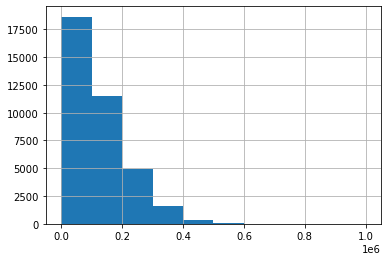

In [31]:
df.mileage.hist();

### modelDate

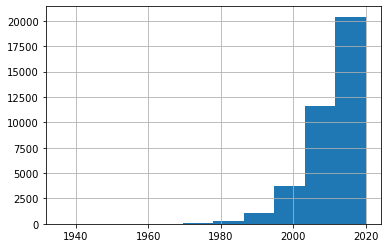

In [32]:
df.modelDate.hist();

### model_name

In [33]:
df.model_name.value_counts()

OCTAVIA         1421
POLO            1150
OUTLANDER       1093
RAPID            984
QASHQAI          938
                ... 
Z                  1
HILUX SURF         1
CAMRY SOLARA       1
920                1
X4 M               1
Name: model_name, Length: 537, dtype: int64

### name

In [34]:
df.name

0                     2.0 AT (190 л.с.)
1                2.4d AT (190 л.с.) 4WD
2                    1.6 AMT (180 л.с.)
3                 2.0 AT (249 л.с.) 4WD
4                 2.5 AT (210 л.с.) 4WD
                      ...              
37074             2.0 AT (249 л.с.) 4WD
37075            2.4 CVT (167 л.с.) 4WD
37076    45 TFSI 2.0 AMT (245 л.с.) 4WD
37077        40 TFSI 2.0 AMT (190 л.с.)
37078       55 Electro AT (301 кВт) 4WD
Name: name, Length: 37079, dtype: object

### numberOfDoors

In [35]:
df.numberOfDoors.value_counts()

5.0    23880
4.0    11854
2.0      924
3.0      421
Name: numberOfDoors, dtype: int64

### parsing_unixtime

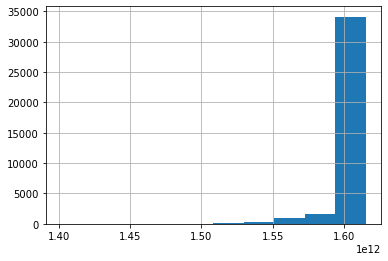

In [36]:
df.parsing_unixtime.hist()

### priceCurrency

In [37]:
df.priceCurrency.value_counts()

RUR    37079
Name: priceCurrency, dtype: int64

### productionDate

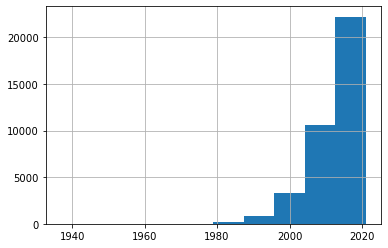

In [38]:
df.productionDate.hist();

### sell_id

In [39]:
df.sell_id

0        1102632297-5cc2974d
1        1102086318-0d0497fd
2        1102697743-74aa0d29
3        1102683086-28471227
4        1102472482-c2fb8583
                ...         
37074    1102696106-a36910cd
37075    1102639806-62dd26bf
37076    1102376375-e4ab725c
37077    1102663723-8d9a9cea
37078    1101629987-a6da2d0e
Name: sell_id, Length: 37079, dtype: object

### vehicleConfiguration

In [40]:
df.vehicleConfiguration.value_counts()

ALLROAD_5_DOORS VARIATOR 2.0        2553
ALLROAD_5_DOORS AUTOMATIC 3.0       2537
ALLROAD_5_DOORS AUTOMATIC 2.0       2317
SEDAN AUTOMATIC 2.0                 1665
SEDAN AUTOMATIC 2.5                 1045
                                    ... 
COUPE AUTOMATIC 6.2                    1
HATCHBACK_3_DOORS MECHANICAL 1.9       1
MINIVAN MECHANICAL 1.4                 1
ROADSTER AUTOMATIC 3.7                 1
ALLROAD_3_DOORS MECHANICAL 4.2         1
Name: vehicleConfiguration, Length: 598, dtype: int64

### vehicleTransmission

In [41]:
df.vehicleTransmission.value_counts()

автоматическая      20067
механическая         6688
роботизированная     5260
вариатор             5064
Name: vehicleTransmission, dtype: int64

### vendor

In [42]:
df.vendor.value_counts()

EUROPEAN    21457
JAPANESE    15622
Name: vendor, dtype: int64

### Adds

In [43]:
df['Привод'].value_counts()

полный      18412
передний    16205
задний       2462
Name: Привод, dtype: int64

In [44]:
df['Руль'].value_counts()

Левый     36071
Правый     1008
Name: Руль, dtype: int64

In [45]:
df['Состояние'].value_counts()

Не требует ремонта    37079
Name: Состояние, dtype: int64

In [46]:
df['Владельцы'].value_counts()

1 владелец     9728
3 или более    9425
2 владельца    7388
Name: Владельцы, dtype: int64

In [47]:
df['ПТС'].value_counts()

Оригинал    33325
Дубликат     3610
Name: ПТС, dtype: int64

In [48]:
df['Таможня'].value_counts()

Растаможен    37079
Name: Таможня, dtype: int64

In [49]:
df['Владение'].value_counts()

{'year': 2019, 'month': 12}    127
{'year': 2020, 'month': 1}     126
{'year': 2018, 'month': 12}    122
{'year': 2020, 'month': 3}     120
{'year': 2019, 'month': 11}    120
                              ... 
{'year': 2004, 'month': 10}      1
{'year': 1999, 'month': 9}       1
{'year': 1999, 'month': 2}       1
{'year': 1993, 'month': 2}       1
{'year': 2002, 'month': 10}      1
Name: Владение, Length: 245, dtype: int64

### Колонки для возможных фич

In [50]:
df.description

0        ЛОТ: 01242183\n\nЛучшее предложение на приобре...
1        Одна из последних в этом кузове. Самый конец 1...
2        Автомобили с пробегом от Официального Дилера У...
3        Официальный дилер Volvo в Москве и Московской ...
4        Внимание! Только для клиентов AVILON Автомобил...
                               ...                        
37074    Комплектация: Volvo XC90 T5 Inscription 7 мест...
37075    Обмен и прочее не интересует, ставить никуда н...
37076    Этот автомобиль в наличии и доступен к просмот...
37077    Этот автомобиль в наличии и доступен к просмот...
37078    Акционная стоимость действует при условии прим...
Name: description, Length: 37079, dtype: object

In [51]:
df.complectation_dict

0        {'id': '22189636', 'name': 'Inscription', 'ava...
1        {'id': '20893102', 'name': 'Summum', 'availabl...
2                                              {'id': '0'}
3        {'id': '21555108', 'name': 'R-Design', 'availa...
4                                              {'id': '0'}
                               ...                        
37074    {'id': '21555855', 'name': 'Inscription 7 мест...
37075    {'id': '21397687', 'name': 'Instyle', 'availab...
37076    {'id': '21649577', 'name': 'Design 45 TFSI qua...
37077    {'id': '21793195', 'name': 'Advance 40 TFSI S ...
37078    {'id': '22291467', 'name': 'Sport 55 quattro',...
Name: complectation_dict, Length: 37079, dtype: object

In [52]:
df.equipment_dict

0        {'asr': True, 'roller-blind-for-rear-window': ...
1        {'cruise-control': True, 'asr': True, 'tinted-...
2        {'cruise-control': True, 'engine-proof': True,...
3        {'sport-seats': True, 'multi-wheel': True, 'au...
4        {'cruise-control': True, 'asr': True, 'front-s...
                               ...                        
37074    {'multi-wheel': True, 'heated-wash-system': Tr...
37075    {'cruise-control': True, 'tinted-glass': True,...
37076    {'cruise-control': True, 'e-adjustment-wheel':...
37077    {'cruise-control': True, 'asr': True, 'esp': T...
37078    {'sport-seats': True, 'e-adjustment-wheel': Tr...
Name: equipment_dict, Length: 37079, dtype: object

In [53]:
df.model_info

0        {'code': 'S90', 'name': 'S90', 'ru_name': 'S90...
1        {'code': 'XC60', 'name': 'XC60', 'ru_name': 'X...
2        {'code': 'S60', 'name': 'S60', 'ru_name': 'S60...
3        {'code': 'XC90', 'name': 'XC90', 'ru_name': 'X...
4        {'code': 'XC90', 'name': 'XC90', 'ru_name': 'X...
                               ...                        
37074    {'code': 'XC90', 'name': 'XC90', 'ru_name': 'X...
37075    {'code': 'OUTLANDER', 'name': 'Outlander', 'ru...
37076    {'code': 'A7', 'name': 'A7', 'ru_name': 'А7', ...
37077    {'code': 'A6', 'name': 'A6', 'ru_name': 'А6', ...
37078    {'code': 'E_TRON', 'name': 'e-tron', 'ru_name'...
Name: model_info, Length: 37079, dtype: object

In [54]:
df.super_gen

0        {'id': '22196923', 'name': 'II Рестайлинг', 'r...
1        {'id': '20012324', 'name': 'I Рестайлинг', 'ru...
2        {'id': '6478325', 'name': 'II', 'ru_name': '2'...
3        {'id': '21552979', 'name': 'II Рестайлинг', 'r...
4        {'id': '2310047', 'name': 'I Рестайлинг', 'ru_...
                               ...                        
37074    {'id': '21552979', 'name': 'II Рестайлинг', 'r...
37075    {'id': '21397304', 'name': 'III Рестайлинг 3',...
37076    {'id': '21134030', 'name': 'II (4K)', 'ru_name...
37077    {'id': '21210593', 'name': 'V (C8)', 'ru_name'...
37078    {'id': '21447469', 'name': 'I', 'ru_name': '1'...
Name: super_gen, Length: 37079, dtype: object

### Сохраним файл в  csv

In [55]:
df.to_csv('train.csv')

## Итоги

* Был сформирован тренировочный датасет, соответсвующий формату тестового 
* Количество записей в тренировочном лишь немного превышает кол-во записей в тестовом,хорошо бы увеличить кол-во данных